# Why Regularize

Regularization plays a very important role in real world implementations of machine learning models. It is a __statistical technique that minimizes overfitting__ and is __executed during the model fitting step__. It is also an __embedded feature selection method__ because it is __implemented while the parameters of the model are being calculated__.

Machine learning algorithms are __rarely deployed__ to production __without__ using some form of __regularization__. The reason for this is as follows: In practice, every model has to deal with the question of how well it can generalize from known to unknown data. We can train, test and tune models on known data and make them as accurate as possible. However, in deploying models, we are applying them on new data. Regularization makes sure that our model is still accurate.

In this lesson, we are going to __learn__ how regularization __minimizes overfitting__ and how to use it as a feature selection method. Along the way, we are also going to learn two concepts that are very relevant to regularization and important just as standalone topics within machine learning, namely, __the bias-variance tradeoff__ and __hyperparameter tuning__. But first, we’re going to answer the question: __what is `overfitting`__?

# What is Overfitting?

Often we have too many features to be able to visually assess if our model is overfitting our data or not. And so we need to qualify what we mean by overfitting exactly.

If a model is able to represent a particular set of data points effectively but is not able to fit new data well, it is overfitting the data. Such a model has one or more of the following attributes:

- It fits the training data well but performs significantly worse on test data
- It typically has more parameters than necessary, i.e., it has high model complexity
- It might be fitting for features that are multi-collinear (i.e., features that are highly negatively or positively correlated)
- It might be fitting the noise in the data and likely mistaking the noise for features

In practice, we often catch overfitting by comparing the model performance on the training data versus test data. For instance __if the R-squared score is high for training data__ but the model __performs poorly on test data__, it’s a strong indicator of overfitting.

A dataset has been loaded for you from the UCI Machine Learning Repository that describes the performance in mathematics of students from two Portuguese schools. We’re going to implement a multiple linear regression model to predict the final grade of the students based on a number of features in the dataset.

   age  Medu  Fedu  traveltime  studytime  failures  famrel  freetime  goout  \
0   18     4     4           2          2         0       4         3      4   
1   17     1     1           1          2         0       5         3      3   
2   15     1     1           1          2         3       4         3      2   
3   15     4     2           1          3         0       3         2      2   
4   16     3     3           1          2         0       4         3      2   

   Dalc  ...  guardian_mother  guardian_other  schoolsup_yes  famsup_yes  \
0     1  ...                1               0              1           0   
1     1  ...                0               0              0           1   
2     2  ...                1               0              1           0   
3     1  ...                1               0              0           1   
4     1  ...                0               0              0           1   

   paid_yes  activities_yes  nursery_yes  higher_yes  internet

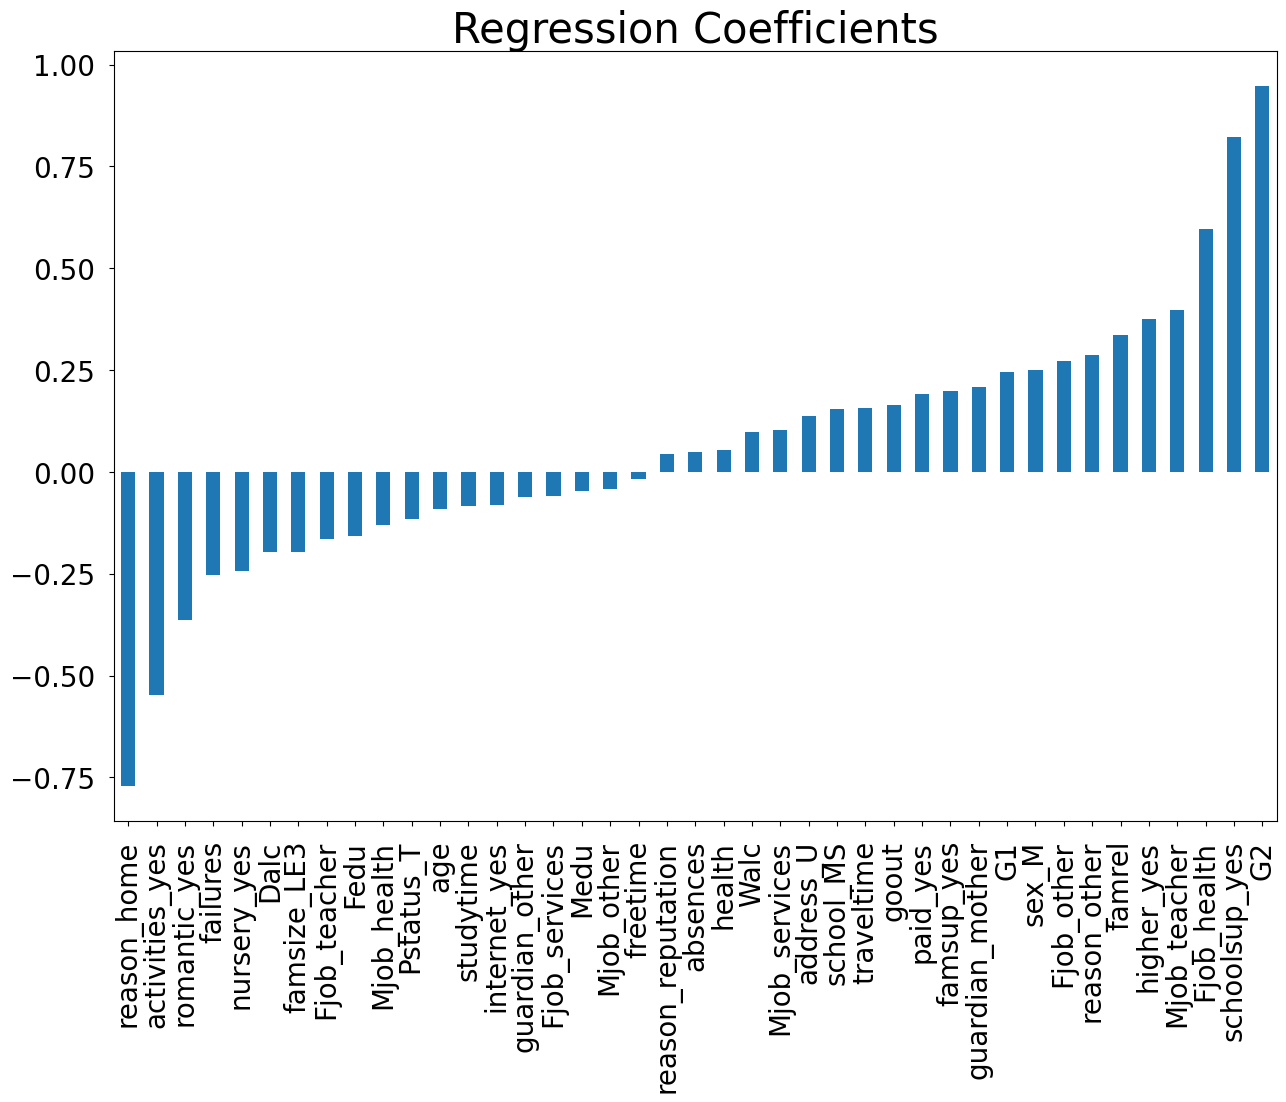

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("./student_math.csv")
print(df.head())

#setting target and predictor variables
y = df['Final_Grade']
X = df.drop(columns = ['Final_Grade'])

# 1. Number of features
num_features = len(X.columns)
print("Number of features: ",num_features)

#Performing a Train-Test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

#Fitting a Linear Regression Model
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

#Training Error
pred_train = model.predict(X_train)
MSE_train = np.mean((pred_train - y_train)**2)
print("Training Error: ", MSE_train)

# 2. Testing Error
pred_test = model.predict(X_test)
MSE_test = np.mean((pred_test - y_test)**2)
print("Testing Error: ", MSE_test)

#Calculating the regression coefficients
predictors = X.columns
coef = pd.Series(model.coef_,predictors).sort_values()

# 3. Plotting the Coefficients

plt.figure(figsize = (15,10))
coef.plot(kind='bar', fontsize = 20)
plt.title ("Regression Coefficients", fontsize = 30)
plt.show()



# The loss function

Let’s revisit how the coefficients (or parameters) of a linear regression model are obtained. Suppose we want to fit a linear regression with two features, x1 and x2:

$$y=b_0 + b_1x_1 +b_2x_2+e$$


We solve for the intercept b0 and coefficients b1 and b2 by minimizing the mean squared error. This is also referred to as the loss function (or alternately, as the objective function or cost function) in machine learning:

$$\frac{1}{n}\sum_{i=1}^{n}(y_i - b_0 - b_1 x_{1i} - b_2 x_{2i})^2 $$


The loss function is minimized by the method of Ordinary Least Squares (OLS) and for larger datasets, the gradient descent algorithm is used to arrive at the minimum. As we have seen already however, the “best fit” as obtained by minimizing the loss function might not be the fit that generalizes well to new data. Regularization modifies the loss function in a way that might help with this.

Before going into more detail, we’re going to plot the loss function as a function of the coefficients b1 and b2. For this, we’re going to generate a dataset for two-feature linear regression using the datasets module from `scikit-learn`. The default data generated by this module is centered, meaning that our intercept, b0 is already set to zero.

In [12]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import rcParams
rcParams['xtick.major.pad']='10'
rcParams['ytick.major.pad']='10'
rcParams['font.size'] = 22
rcParams['axes.labelsize'] = 22
rcParams['axes.labelweight'] = 'bold'
rcParams['axes.titlesize'] = 17
rcParams['xtick.labelsize'] = 15
rcParams['ytick.labelsize'] = 15
rcParams['legend.fontsize'] = 16
rcParams['figure.titlesize'] = 1

def loss_function(b1,b2,y,x1,x2):
    error = y - b1*x1 - b2*x2
    loss = np.mean(error**2)
    return loss

def plot_loss_function(b1,b2,y,x1,x2):
    loss = np.asarray([[loss_function(i,j,y,x1,x2) for i in b1] for j in b2])
    fig, ax = plt.subplots(figsize = (10,10))
    CS = ax.contour(b1, b2, loss, levels = [0,10, 100, 500, 1000, 3000, 5000, 8000], colors='k')
    ax.clabel(CS, fontsize=9,fmt='%1.1f', inline=True)
    ax.set_title('Loss function without Regularization')
    plt.plot([0,0,0,0,0], [-150,0,10,50,150], color = 'grey', linestyle = 'dashed')
    plt.plot([-150,0,10,50,150],[0,0,0,0,0], color = 'grey', linestyle = 'dashed')
    plt.xlim(-50,150)
    plt.ylim(-50,150)
    plt.xlabel('b1')
    plt.ylabel('b2')
    return CS

[77.30856619 18.87896326]


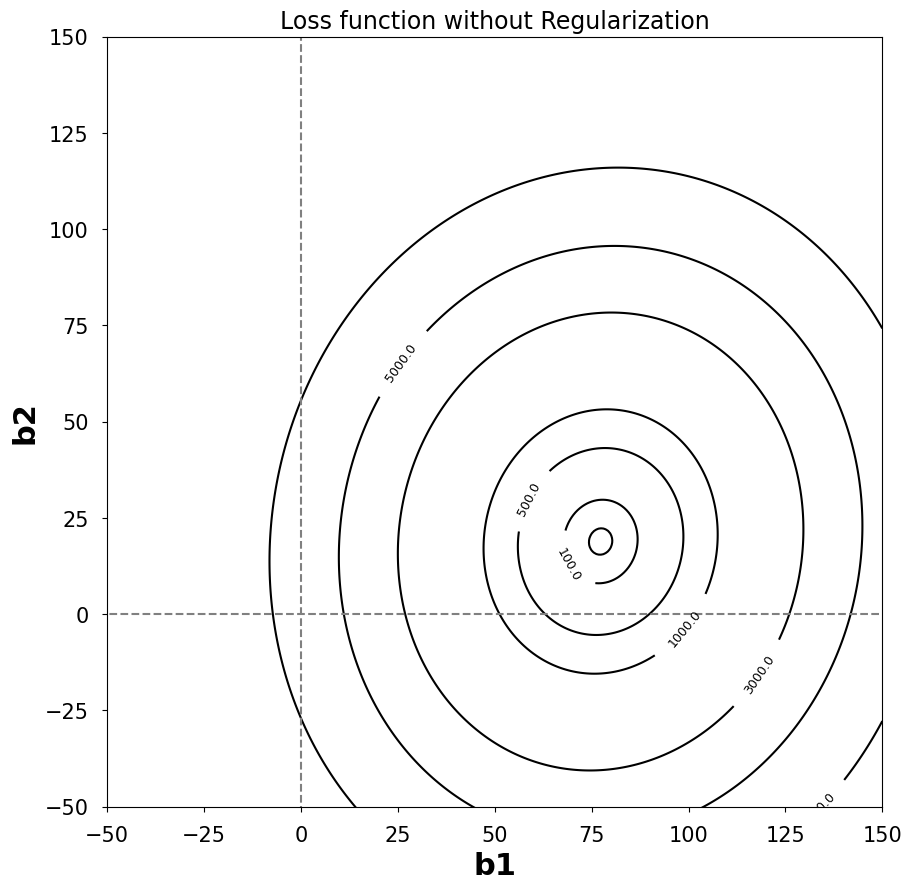

In [13]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets
data, y, coefficients = datasets.make_regression(n_samples = 100, n_features = 2, coef = True, random_state = 23)
x1 = data[:,0]
x2 = data[:,1]

# 1. Print the coefficients
print(coefficients)

# 2. Loss Function
def loss_function(b1,b2,y,x1,x2):
    error = y - b1*x1 - b2*x2
    loss = np.mean(error**2)
    return loss

# 3. Plot loss function for data
b1 = np.linspace(-150, 150, 501)
b2 = np.linspace(-150, 150, 501)
contour_plot = plot_loss_function(b1,b2,y,x1,x2)
plt.show()

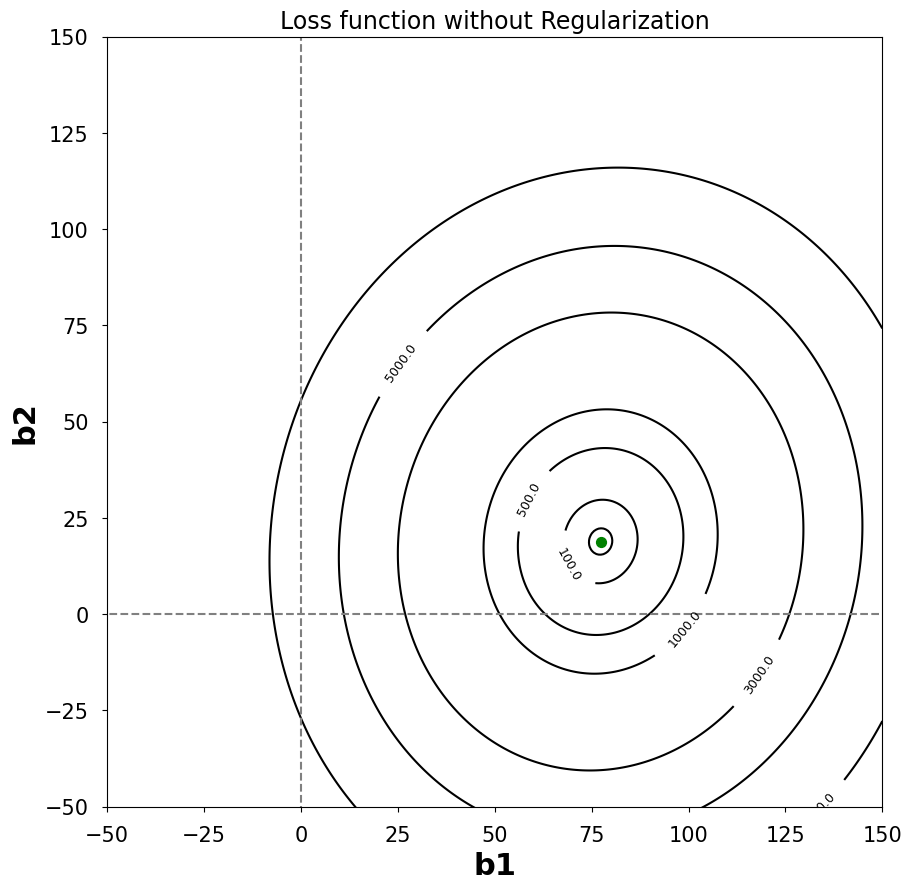

In [14]:
# 4. Plot the best fit coefficients
best_fit_b1 = coefficients[0]
best_fit_b2 = coefficients[1]
contour_plot = plot_loss_function(b1,b2,y,x1,x2)
plt.scatter(best_fit_b1, best_fit_b2, s = 50, color = 'green')
plt.show()

# The Regularization Term

__Regularization penalizes models for overfitting by adding__ a ___“penalty term”___ to the loss function. The two most commonly used ways of doing this are known as __Lasso (or L1) and Ridge (or L2) regularization__.

Both of these rely on penalizing overfitting by controlling how large the coefficients can get in the first place. The penalty term or regularization term is multiplied by a factor alpha and added to the old loss function as follows:

$$New\,loss\,function=Old\,loss\,function+α∗Regularization\,term$$


Because of the additive term, minimizing the new loss function will necessarily mean “true loss” goes up, i.e., the scores on this will be lower on the training data than regression without regularization! But this is what we want when we are regularizing. Remember that the reason we’re regularizing is because our model is overfitted to our data (i.e., it is performing well on training data but doesn’t generalize well on test data).

The regularization term is the sum of the absolute values of the coefficients in the case of L1 regularization and the sum of the squares of the coefficients in the case of L2.

$$ L1\, Regularization\,term:\,|b_1|+|b_2|$$

$$ L2\, Regularization\,term:\,b_1^2+b_2^2$$
 
In mathematics, the sum of the magnitudes of a vector is known as its L1 norm (related to “Manhattan distance”) and the square root of the sum of the magnitudes (or the “Euclidean distance” from the origin) is known as its L2 norm - and that is the reason for the names of both methods!